In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from PIL import Image
import cv2
import os

### Path to zip folder
#zip_path = "C:/Users/Sven Jacob/Downloads/Video_006.zip"
zip_path = "/home/sven/Downloads/VOT18CAR1/data.zip"

img_folder = "Video_006/Video_006/"

with zipfile.ZipFile(zip_path, 'r') as zip_file:
    file_names = zip_file.namelist()
    print(file_names)
    png_files = [f for f in file_names if f.startswith("Video_006/Video_006/Img") and f.lower().endswith(".bmp")]
    png_files = np.sort(png_files)
    #print(png_files)
    frames = []
    for png in png_files:
        with zip_file.open(png) as file:
            image_bytes = file.read()
            image_array = np.frombuffer(image_bytes, dtype=np.uint8)
            #image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
            image = cv2.imdecode(image_array,cv2.IMREAD_COLOR)#, cv2.COLOR_BGR2RGB)
            frames.append(image)

['Video_006/', 'Video_006/Video_006/', 'Video_006/Video_006.avi', 'Video_006/Video_006.xml', 'Video_006/Video_006/Img_00039.bmp', 'Video_006/Video_006/Img_00040.bmp', 'Video_006/Video_006/Img_00041.bmp', 'Video_006/Video_006/Img_00042.bmp', 'Video_006/Video_006/Img_00043.bmp', 'Video_006/Video_006/Img_00044.bmp', 'Video_006/Video_006/Img_00045.bmp', 'Video_006/Video_006/Img_00046.bmp', 'Video_006/Video_006/Img_00385.bmp', 'Video_006/Video_006/Img_00386.bmp', 'Video_006/Video_006/Img_00387.bmp', 'Video_006/Video_006/Img_00388.bmp', 'Video_006/Video_006/Img_00389.bmp', 'Video_006/Video_006/Img_00390.bmp', 'Video_006/Video_006/Img_00391.bmp', 'Video_006/Video_006/Img_00392.bmp', 'Video_006/Video_006/Img_00393.bmp', 'Video_006/Video_006/Img_00394.bmp', 'Video_006/Video_006/Img_00395.bmp', 'Video_006/Video_006/Img_00461.bmp', 'Video_006/Video_006/Img_00462.bmp', 'Video_006/Video_006/Img_00463.bmp', 'Video_006/Video_006/Img_00464.bmp', 'Video_006/Video_006/Img_00465.bmp', 'Video_006/Video_00

In [195]:
zip_path = "/home/sven/Downloads/VOT18Basketball1/data"
filetype = 'jpg'
frames = []
with zipfile.ZipFile(zip_path, 'r') as zip_file:
    file_names = zip_file.namelist()
    image_files = [f for f in file_names if f.lower().endswith("."+filetype)]
    image_files = np.sort(image_files)
    #print(image_files)
    for file in image_files:
        with zip_file.open(file) as f:
            image_bytes = f.read()
            image_array = np.frombuffer(image_bytes, dtype=np.uint8)

            frames.append(cv2.imdecode(image_array,cv2.IMREAD_COLOR))


In [196]:
fps = 30

#first_image = cv2.imread(frames[0])
height, width, layers = frames[0].shape  # Get image size
output_video = "VOT18BasketBall1.mp4"  # Output video file
# Define the video codec (XVID for AVI, MJPG for MP4)
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for AVI
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4

# Create VideoWriter object
video = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# Iterate through images and add them to the video
for file in frames:
    video.write(file)

# Release the video writer
video.release()

print(f"Video saved as {output_video}")

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Video saved as VOT18BasketBall1.mp4


In [209]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.random
from torchvision.ops import box_iou as IOU
import torchvision.transforms as transforms
from ultralytics import YOLO

# Load YOLO model (fixed during attack)
yolo_model = YOLO("yolo11n.pt").eval()

frame=10

## need to resize it such that w and h is divisible by 32 and has 3 channels
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((640,640)) # Resize to model's expected input size
])

img_tensor = transform(frames[frame]).unsqueeze(0) 

#img_tensor = torch.stack((img_tensor.squeeze(0),)*3,dim=1)


# Run inference on the source
results = yolo_model(img_tensor,show=True,conf=0.5)
cv2.waitKey(0)
cv2.destroyAllWindows() # list of Results objects


0: 640x640 4 persons, 4.8ms
Speed: 0.5ms preprocess, 4.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


In [197]:
video_path = "/home/sven/Documents/GitHub/MatrixAdvAttacks/VOT18BasketBall1.mp4"
results = yolo_model.track(video_path,show=True)
cv2.waitKey(0)
cv2.destroyAllWindows()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/725) /home/sven/Documents/GitHub/MatrixAdvAttacks/VOT18BasketBall1.mp4: 480x640 7 persons, 1 train, 6.0ms
video 1/1 (frame 2/725) /home/sven/Documents/GitHub/MatrixAdvAttacks/VOT18BasketBall1.mp4: 480x640 7 persons, 1 train, 5.5ms
video 1/1 (frame 3/725) /home/sven/Documents/GitHub/MatrixAdvAttacks/VOT18BasketBall1.mp4: 480x640 6 persons, 1 train, 5.5ms
video 1/1 (frame 4/725) /home/sven/Documents/GitHub/MatrixAdvAttacks/VOT18BasketB

In [210]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [137]:
yolo_model.model.model[0]

Conv(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
)

In [94]:
results[0].summary()[0]

{'name': 'person',
 'class': 0,
 'confidence': 0.61828,
 'box': {'x1': 477.61151, 'y1': 126.67281, 'x2': 495.74445, 'y2': 174.93538}}

In [ ]:
yolo_model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0): Bottleneck(
          (cv1): Conv(
            (conv): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (3): Conv(
      (conv): Conv2d(64,

In [20]:
W,H = frames[0].shape

def mask_img(img,mask):
    img_tensor = transform(img).unsqueeze(0)*mask

    img_tensor = torch.stack((img_tensor.squeeze(0),)*3,dim=1)
    return img_tensor

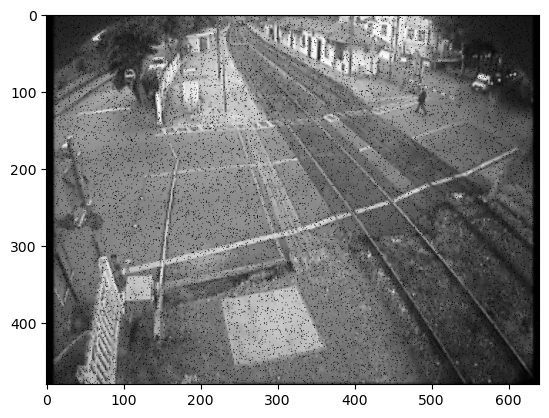

In [ ]:
Mask = torch.rand(480,640)
Mask[Mask >0.05]=1
Mask[Mask <=0.05] = 0
masekd_tensor = mask_img(frames[frame],Mask)

plt.imshow(masekd_tensor.squeeze(0).mean(axis=0).detach().cpu().numpy(),cmap='gray')

In [30]:
frames[frame].shape

(240, 320)

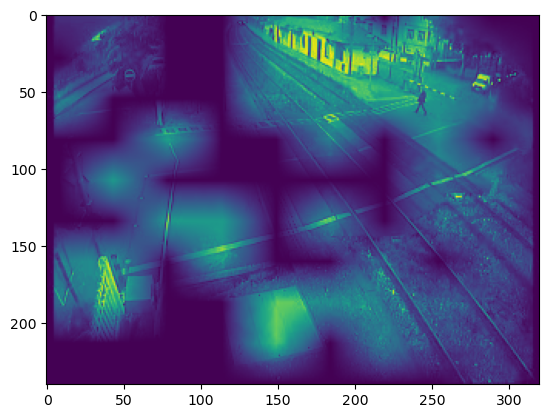

In [68]:
import math
def generate_mask(image_size, grid_size, prob_thresh):
    image_w, image_h = image_size
    grid_w, grid_h = grid_size
    cell_w, cell_h = math.ceil(image_w / grid_w), math.ceil(image_h / grid_h)
    up_w, up_h = (grid_w + 1) * cell_w, (grid_h + 1) * cell_h

    mask = (np.random.uniform(0, 1, size=(grid_h, grid_w)) <
            prob_thresh).astype(np.float32)
    mask = cv2.resize(mask, (up_w, up_h), interpolation=cv2.INTER_LINEAR)
    offset_w = np.random.randint(0, cell_w)
    offset_h = np.random.randint(0, cell_h)
    mask = mask[offset_h:offset_h + image_h, offset_w:offset_w + image_w]
    return mask


mask  = generate_mask(frames[frame].shape,(10,10),0.5)

def mask_image(image, mask):
    masked = image*mask.T#((image.astype(np.float32) / 255 * np.dstack([mask] * 3)) *
              #255).astype(np.uint8)
    return masked

plt.imshow(mask_image(frames[frame],mask))

In [76]:
results[0].summary()

[{'name': 'umbrella',
  'class': 25,
  'confidence': 0.77058,
  'box': {'x1': 18.16626, 'y1': 1.60312, 'x2': 630.92712, 'y2': 478.52307}}]

In [26]:
results = yolo_model(masekd_tensor,show=True)
cv2.waitKey(0)
cv2.destroyAllWindows() # list of Results objects


0: 480x640 1 umbrella, 7.8ms
Speed: 14.8ms preprocess, 7.8ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)
